## テキストデータの分析－形態素解析，Word Cloud，共起性，etc.


### 例題2-1. 準備
##### 日本語フォントとMecab

In [1]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントとmecabをインストール
system("apt-get install -y fonts-ipafont mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8")
# フォント一覧を表示
# systemfonts::system_fonts()
install.packages("RMeCab", repos="http://rmecab.jp/R/")
library(RMeCab)
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,速度,距離
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


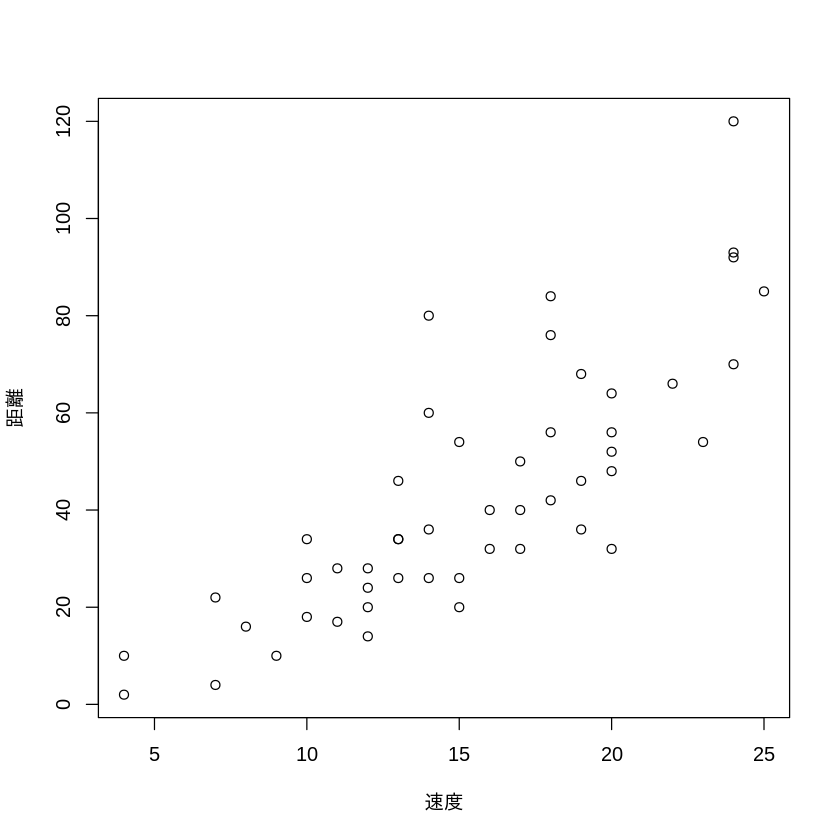

In [ ]:
# 確認（グラフでの日本語）
head(cars, 3)
colnames(cars) <- c("速度","距離")
plot(cars)

### 例題2-2　表形式データのスライス 
##### 行列やデータフレームなど2次元の表形式のデータについて，その一部を取り出して処理したいことがしばしばある．簡単なケースをいくつかを例示するので，復習しておこう．

In [ ]:
d <- data.frame(matrix(1:24, nrow=6)); d
#d[3, 2]    # 3行2列
#d[c(1, 3, 5), c(2, 4)]    # (1,3,5)行(2,4)列

X1,X2,X3,X4
<int>,<int>,<int>,<int>
1,7,13,19
2,8,14,20
3,9,15,21
4,10,16,22
5,11,17,23
6,12,18,24


In [ ]:
d[3:5,]			# 3～5行
d[,2:4]			# 2～4列
d[3:5, 2:4]			# 3～5行, 2～4列

In [ ]:
nrow(d)			# 行数
ncol(d)			# 列数
dim(d)			# 行列数

In [ ]:
#d[3:nrow(d),]		# 3行以降
d[,2:ncol(d)]		# 2列以降
#d[3:nrow(d), 2:ncol(d)]	# 3行2列以降

X2,X3,X4
<int>,<int>,<int>
7,13,19
8,14,20
9,15,21
10,16,22
11,17,23
12,18,24


In [ ]:
d[-(3:5),]			# 3～5行以外
d[,-c(2,3)]			# 2,3列以外

### Ex.2-1　RMeCabの関数
##### ここでは，RMecabパッケージに含まれるいくつかの関数を使ってみよう．　　
---
【問題】以下のRスクリプトについて，各コマンド（の機能）についてのコメントを「#」以降に記述しなさい．※実行して結果を確認したり，ネット等で調べたりして，自分の言葉で書いてください．

In [ ]:
library(RMeCab)
# [例題]　s：文章（文字列）変数→形態素
s <- "今朝は早く起きた。"    # 解答例：文字列をオブジェクト（変数）sに代入
class(s)    #  解答例：sのクラス（型）は？－文字列型
RMeCabC(s)    # 解答例：文字列sを（品詞を付加して）形態素（表層形）に分解する
RMeCabC(s, 1)    # 解答例：文字列sを（品詞を付加して）形態素（基本形）に分解する

[1] "character"

[[1]]
  名詞 
"今朝" 

[[2]]
助詞 
"は" 

[[3]]
形容詞 
"早く" 

[[4]]
  動詞 
"起き" 

[[5]]
助動詞 
  "た" 

[[6]]
記号 
"。"

[[1]]
  名詞 
"今朝" 

[[2]]
助詞 
"は" 

[[3]]
形容詞 
"早い" 

[[4]]
    動詞 
"起きる" 

[[5]]
助動詞 
  "た" 

[[6]]
記号 
"。"

In [ ]:
# [1] fn：文章ファイル → 形態素
s <- "すもももももももものうち"    # 
fn <- "tmp.txt"    # 
write(s, fn)    # 
dir()    # 
readLines(fn)    # 
# G.Colab.の左の「ファイル」メニューを開き「更新」アイコンを押して作ったファイルを確認せよ

[1] "sample_data" "tmp.txt"     "tmpd"

[1] "すもももももももものうち"

In [ ]:
res1 <- docDF(fn, type=1)    #
print(res1)    # 
#res0 <- docDF(fn, type=0); res0    # 参考

file_name =  ./tmp.txt opened
number of extracted terms = 5
now making a data frame. wait a while!

    TERM POS1   POS2 tmp.txt
1   うち 名詞 非自立       1
2 すもも 名詞   一般       1
3     の 助詞 連体化       1
4     も 助詞 係助詞       2
5   もも 名詞   一般       2


In [ ]:
# [2] d：データフレーム（の列要素）→ 形態素
ID <- 1:3    # 
Sex <- c("F", "M", "F")    # 
Rem <- c("今朝は早く起きた。", "昨夜は遅く寝た。", "今朝の食事は遅かった．")    # 
d <- data.frame(ID, Sex, Rem)    # 
d    #  

ID,Sex,Rem
<int>,<chr>,<chr>
1,F,今朝は早く起きた。
2,M,昨夜は遅く寝た。
3,F,今朝の食事は遅かった．


In [ ]:
res <- docDF(d, 3, type=1); res    # 
res <- docDF(d, 3, type=1, pos=c("名詞","形容詞")); res    #
res <- docDF(d, 3, type=1, pos=c("名詞","形容詞"), minFreq=2); res    #

number of extracted terms = 12
now making a data frame. wait a while!



,TERM,POS1,POS2,Row1,Row2,Row3
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,。,記号,句点,1,1,0
2,た,助動詞,*,1,1,1
3,の,助詞,連体化,0,0,1
4,は,助詞,係助詞,1,1,1
5,今朝,名詞,副詞可能,1,0,1
6,寝る,動詞,自立,0,1,0
7,早い,形容詞,自立,1,0,0
8,昨夜,名詞,副詞可能,0,1,0
9,起きる,動詞,自立,1,0,0


number of extracted terms = 5
now making a data frame. wait a while!



,TERM,POS1,POS2,Row1,Row2,Row3
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,今朝,名詞,副詞可能,1,0,1
2,早い,形容詞,自立,1,0,0
3,昨夜,名詞,副詞可能,0,1,0
4,遅い,形容詞,自立,0,1,1
5,食事,名詞,サ変接続,0,0,1


number of extracted terms = 2
now making a data frame. wait a while!



,TERM,POS1,POS2,Row1,Row2,Row3
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,今朝,名詞,副詞可能,1,0,1
2,遅い,形容詞,自立,0,1,1


In [ ]:
# [3]　dn：（文章ファイルの）ディレクトリ → 形態素（文書ターム行列）
dn <- "tmpd"    # 
dir.create(dn)    # 
fn <- c("f1.txt", "f2.txt", "f3.txt")    # 
fn <- paste0(dn, "/", fn)    # 
for (i in 1:3){    # 
  write(Rem[i], fn[i])    # 
}    # 
dir(dn)    # 
# G.Colab.の左の「ファイル」メニューを開き「更新」アイコンを押して作ったディレクトリを確認せよ

Warning message in dir.create(dn):
“'tmpd' already exists”


[1] "f1.txt" "f2.txt" "f3.txt"

In [ ]:
res <- docDF(dn, type=1); res    #
res <- docDF(dn, type=1, minFreq = 2); res    #
res <- docDF(dn, type=1, pos=c("名詞", "動詞")); res    #

file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 12
now making a data frame. wait a while!



,TERM,POS1,POS2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,。,記号,句点,1,1,0
2,た,助動詞,*,1,1,1
3,の,助詞,連体化,0,0,1
4,は,助詞,係助詞,1,1,1
5,今朝,名詞,副詞可能,1,0,1
6,寝る,動詞,自立,0,1,0
7,早い,形容詞,自立,1,0,0
8,昨夜,名詞,副詞可能,0,1,0
9,起きる,動詞,自立,1,0,0


file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 5
now making a data frame. wait a while!



,TERM,POS1,POS2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,。,記号,句点,1,1,0
2,た,助動詞,*,1,1,1
3,は,助詞,係助詞,1,1,1
4,今朝,名詞,副詞可能,1,0,1
5,遅い,形容詞,自立,0,1,1


file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 5
now making a data frame. wait a while!



,TERM,POS1,POS2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,今朝,名詞,副詞可能,1,0,1
2,寝る,動詞,自立,0,1,0
3,昨夜,名詞,副詞可能,0,1,0
4,起きる,動詞,自立,1,0,0
5,食事,名詞,サ変接続,0,0,1


In [ ]:
# [4]　dn：ディレクトリ → 形態素（文書ターム行列）※重み付き　
# 参照：http://www.ic.daito.ac.jp/~mizutani/mining/term_document_matrix.html
# 「検索語・文書行列の重み付け 〜 TF・IDF法」と
# 「TF・IDF法による検索語・文書行列の規格化」の部分を読むこと
res <- docDF(dn, type=1, pos=c("名詞", "形容詞", "動詞"), weight="tf*idf"); res
    #
res <- docDF(dn, type=1, pos=c("名詞", "形容詞", "動詞"), weight="tf*idf*norm"); res
    #
res[,4:6]    # 
colSums(res[,4:6]^2)  # 

file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 7
now making a data frame. wait a while!



,TERM,POS1,POS2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,今朝,名詞,副詞可能,1.584963,0.000000,1.584963
2,寝る,動詞,自立,0.000000,2.584963,0.000000
3,早い,形容詞,自立,2.584963,0.000000,0.000000
4,昨夜,名詞,副詞可能,0.000000,2.584963,0.000000
5,起きる,動詞,自立,2.584963,0.000000,0.000000
6,遅い,形容詞,自立,0.000000,1.584963,1.584963
7,食事,名詞,サ変接続,0.000000,0.000000,2.584963


file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 7
now making a data frame. wait a while!



,TERM,POS1,POS2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,今朝,名詞,副詞可能,0.3977829,0.0000000,0.4632444
2,寝る,動詞,自立,0.0000000,0.6487560,0.0000000
3,早い,形容詞,自立,0.6487560,0.0000000,0.0000000
4,昨夜,名詞,副詞可能,0.0000000,0.6487560,0.0000000
5,起きる,動詞,自立,0.6487560,0.0000000,0.0000000
6,遅い,形容詞,自立,0.0000000,0.3977829,0.4632444
7,食事,名詞,サ変接続,0.0000000,0.0000000,0.7555191


,f1.txt,f2.txt,f3.txt
,<dbl>,<dbl>,<dbl>
1,0.3977829,0.0000000,0.4632444
2,0.0000000,0.6487560,0.0000000
3,0.6487560,0.0000000,0.0000000
4,0.0000000,0.6487560,0.0000000
5,0.6487560,0.0000000,0.0000000
6,0.0000000,0.3977829,0.4632444
7,0.0000000,0.0000000,0.7555191


f1.txt f2.txt f3.txt 
     1      1      1

In [ ]:
# [5] 　dn：ディレクトリ（or fn：ファイル） → N-gram
# 参考：「Nグラム統計」http://www.ic.daito.ac.jp/~mizutani/mining/n_gram.html
# に目を通すこと
dn <- "tmpd"    #
res <- NgramDF2(dn, type=1, N=2); res    # 
res <- NgramDF2(dn, type=1, N=2, pos=c("名詞", "動詞")); res    # 
res <- NgramDF2(dn, type=1, N=3, pos=c("名詞", "形容詞", "動詞")); res    # 
res <- NgramDF2(dn, type=2, N=2); res    # 
fn <- "tmpd/f2.txt"    # 
res <- NgramDF2(fn, type=0, N=2); res    # 

file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 4



,Ngram1,Ngram2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<int>,<int>,<int>
1,今朝,早い,1,0,0
2,今朝,食事,0,0,1
3,昨夜,遅い,0,1,0
4,食事,遅い,0,0,1


file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 3



,Ngram1,Ngram2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<int>,<int>,<int>
1,今朝,起きる,1,0,0
2,今朝,食事,0,0,1
3,昨夜,寝る,0,1,0


file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 3



,Ngram1,Ngram2,Ngram3,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,今朝,早い,起きる,1,0,0
2,今朝,食事,遅い,0,0,1
3,昨夜,遅い,寝る,0,1,0


file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 7



,Ngram1,Ngram2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<int>,<int>,<int>
1,助動詞,記号,1,1,1
2,助詞,名詞,0,0,1
3,助詞,形容詞,1,1,1
4,動詞,助動詞,1,1,0
5,名詞,助詞,1,1,2
6,形容詞,助動詞,0,0,1
7,形容詞,動詞,1,1,0


file_name =  tmpd/f2.txt opened
number of extracted terms = 7



,Ngram1,Ngram2,f2.txt
,<chr>,<chr>,<int>
1,く,寝,1
2,た,。,1
3,は,遅,1
4,夜,は,1
5,寝,た,1
6,昨,夜,1
7,遅,く,1


In [ ]:
# [6] コロケーションとTスコア，MIスコア
# 参考：「コロケーションと語彙分析」
# http://www.ic.daito.ac.jp/~mizutani/mining/collocation.html
# に目を通すこと 
fn <- "tmpd/f3.txt"    # 
readLines(fn)    # 
collocate(fn, node="は", span=1)    # 
collocate(fn, node="は", span=2)    # 
collocate(fn, node="は", span=3)    # 

[1] "今朝の食事は遅かった．"

file = tmpd/f3.txt 
length = 7 


,Term,Before,After,Span,Total
,<chr>,<int>,<int>,<int>,<int>
1,は,1,0,1,1
2,遅い,0,1,1,1
3,食事,1,0,1,1
4,[[MORPHEMS]],2,1,3,7
5,[[TOKENS]],2,1,3,7


file = tmpd/f3.txt 
length = 7 


,Term,Before,After,Span,Total
,<chr>,<int>,<int>,<int>,<int>
1,た,0,1,1,1
2,の,1,0,1,1
3,は,1,0,1,1
4,遅い,0,1,1,1
5,食事,1,0,1,1
6,[[MORPHEMS]],3,2,5,7
7,[[TOKENS]],3,2,5,7


file = tmpd/f3.txt 
length = 7 


,Term,Before,After,Span,Total
,<chr>,<int>,<int>,<int>,<int>
1,た,0,1,1,1
2,の,1,0,1,1
3,は,1,0,1,1
4,今朝,1,0,1,1
5,遅い,0,1,1,1
6,食事,1,0,1,1
7,．,0,1,1,1
8,[[MORPHEMS]],4,3,7,7
9,[[TOKENS]],4,3,7,7


In [ ]:
res <- collocate(fn, node="は", span=2)    # 
collScores(res, node="は", span=2)    # 

file = tmpd/f3.txt 
length = 7 


,Term,Before,After,Span,Total,T,MI
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,た,0,1,1,1,0.4285714,0.8073549
2,の,1,0,1,1,0.4285714,0.8073549
3,は,1,0,1,1,NA,NA
4,遅い,0,1,1,1,0.4285714,0.8073549
5,食事,1,0,1,1,0.4285714,0.8073549
6,[[MORPHEMS]],3,2,5,7,NA,NA
7,[[TOKENS]],3,2,5,7,NA,NA


### Ex.2-2　「基礎演習S」シラバスの形態素解析とWord Cloud
##### 「基礎演習S」のシラバスについて，Word Cloudを作りたい．ここでは，以下の番号順に進めてみよう．
1. ファイルの内容を画面に表示する．  
1. 
   - docDF関数を使って形態素解析（品詞は，"名詞","形容詞","動詞"）を行い，結果を変数datに入れる（結果は必ず確認し，不適切と思われる形態素を考えよ）．  
   - datの列名を確認し，（頻度を示す）4列目の列名を「FREQ」に変更する． 
1. Word Cloudとして不適切な形態素をあげ，datから削除する．
1. wordcloudパッケージを使ってWord Cloudを描く（頻度の少ないものは適宜除く）．
---
#####【問題】
以下に示すRスクリプトの< >部分を補って完成し，また，それを使ってWord Cloudを描きなさい．なお，スクリプト中の[　]は，上記手順の番号に対応している．

In [ ]:
# 「基礎演習S」のシラバスをセッションストレージにアップしておく
#rm(list=ls(all=TRUE)); ls()
library(RMeCab)					# RMeCabを使用可能に

# [1]
fn <- "<1>.txt"         # 基礎演習S
readLines(fn)				    # ファイルの内容を画面に表示

In [ ]:
# [2]
#gc(); gc()              # ガベージコレクション
dat <- docDF(fn, type = <2>, pos = c(<3>))
#dat
names(dat)
names(dat)<4> <- "FREQ" # 列名の4番目を"FREQ"に変更
class(<5>); nrow(<5>)   # datのクラスと行数表示
head(dat, <6>); tail(dat, <6>)   # datの最初の5要素，最後の5要素
dat[100:<7>,]    # datの100行目からの5要素

In [ ]:
# [3]
# Stop Wordは，いろいろな考え方があり得るところ（以下は例）
# (1) 記号　(, ), :, ? など（半角・全角），特に句読点（パンクチュエーション）
# (2) 数字（半角・全角）　※年代などもあるが
# (3) 語尾：的, 権, 法, 化, 等, 市
# (4) アルファベット1文字（大文字・小文字・半角・全角）※「R」などもあるが
# (5) 非自立語：いる，こと，ため
# (6) どのシラバスにも共通するもの：到達/目標, DP, 講義/計画　※今回略
# (7) 一般的・抽象的すぎるもの：する, できる, ある, 代名詞　　※今回略
# -------------------------------------------------------------------
# (1)パンクチュエーション削除
# 参照：「R における正規表現」の「拡張正規表現 (既定動作)」の項
#       http://www.okadajp.org/RWiki/?R%20における正規表現
ne <- grep("<8>", dat$TERM)      # dat$TERM中のパンクチュエーションの位置（行番号）
dat$TERM[ne]
dat <- dat[-ne,]      # neの行削除　※neが空（要素数0）だとエラーになるので注意
# (4) アルファベット1文字削除
ne <- grep("<9>", dat$TERM)
dat$TERM[ne]
dat <- dat[-ne,]
# (2,3,5) 数・接尾・非自立を削除
ne <- which(dat$<10> %in% c(<11>))
dat$TERM[ne]
dat <- dat[-ne,]
dat$TERM

In [ ]:
# [4]
install.packages(c("wordcloud"), dependencies=TRUE)
library('wordcloud')
#wordcloud(res$Term, res$Freq, min.freq = 3, scale = c(8, 1.1), colors = brewer.pal(8, "Dark2"))
wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(7, 2), colors = brewer.pal(8, "Paired"))
# ヒント：wordcloudのscaleやbrewer.palのパラメータを適当に変えて見やすいものを探そう．


###Ex.2-3　「基礎演習」シラバスの比較 （Word Cloudと棒グラフ）
#### 「基礎演習S」とそれ以外の基礎演習（インタラクションデザイン（基礎演習Dと同じ）とソフトウェア開発）のシラバスを比較したい．※情報英語基礎演習は除く．
---
####【問題】 
1. Ex.2-2の[2][3]で扱った形態素素解析の処理の部分を関数化しなさい．
  - 関数名は"getMorph"．
  - 引数は（科目シラバスファイルの）ファイルパスと品詞（docDFのpos）．
  - 戻り値は（不適切なものを除いた）形態素のデータフレーム．
1.getMorphとwordcloud関数を使って，3つの基礎演習の名詞・形容詞・動詞についてWord Cloudを描き，比較して気付きを簡単にコメントしなさい．
1.3つの基礎演習について，出現頻度のtop10の名詞（のみ）を棒グラフで示して比較しなさい．ヒント：頻度の多い順に並べ替えて10行分取る．orderとdecreasingパラメータ, barplotとnames.arg, lasパラメータなどを調べてみると良いだろう．

In [ ]:
library(RMeCab)
# [1]
getMorph <- function(fn, pos) {
  
}

In [ ]:
# [2]
library('wordcloud')


In [ ]:
# [3]
barMorph <- function(fn, pos, sn, n) {		# 
  dat <- getMorph(fn, pos)			# 
  id <- order(dat$FREQ, decreasing=TRUE)    # 
  h <- dat[id[1:n], 4]			# 
  noun <- dat[id[1:n], 1]			# 
  #par(mar=c(7,3,3,2))
  barplot(h, names.arg=noun, las=2, main=sn)	# 
}

# 基礎演習S，インタラクションデザイン（基礎演習D），ソフトウェア開発（SD基礎演習）のW.Cloud
fns <- c( <1> )				# 3教科のファイル名ベクトル
pos <- c("名詞")				# 
sns <- c("基礎演習S", "基礎演習D", "SD基礎演習")	# 
n <- 10					# 
for(i in 1:3) barMorph(fns[i], pos, sns[i], n)	# 


### Ex.2-4　NE2022シラバスの形態素解析とWord Cloud
##### ネットワーク情報学部専門科目全体のシラバス（「NE2022」フォルダ（ディレクトリ）内に収納）についてWord Cloudを描きたい（品詞は名詞, 形容詞, 動詞とし，頻度の多い方から150の形態素に限定しよう）．
---
#####【問題】 
1. 以下に示すRスクリプトの< >部分を補って完成し，処理の流れを簡潔に説明しなさい．  
1. Word Cloudの図を示しなさい．  

##### 【ヒント】
* 「NE2022」フォルダを圧縮した「NE2022.zip」ファイルは事前にセッションストレージにアップしておく（スクリプトの最初で展開する）．
* docDF関数による形態素（頻度）解析では，ファイル（パス）だけでなく，フォルダ（パス）を関数の引数にとることができる（従って，getMorph関数を使用できる）．
* また，その場合，フォルダ内の特定のファイル（の形態素頻度）は，docDF関数が返すデータフレームの特定の列（4列目以降）に対応する．従って，科目全体の形態素頻度を求めるには，各行（=形態素に対応）ごとに4列目以降の列の値（頻度）の和を計算すればよい事が分かる．
*それには「rowSums」関数を用いることもできるが，ここでは，より汎用的な「apply」関数（と「sum」関数）で代用してみよう．


In [ ]:
system("apt -y install zip && unzip NE2022.zip")    # フォルダ解凍

In [ ]:
# [1]
library('RMeCab')
library('wordcloud')

fn <- "NE2022"     # フォルダ
pos <- c("名詞","形容詞","動詞")
dat <- getMorph(fn, pos)
FREQ <- apply(<1>)     # 「datの4列以降の部分」を「行方向」に「合計」
dat <- cbind(<2>)      # 「datの1〜3列の部分」と「FREQ」を列方向に結合
head(dat); tail(dat)    # 最初と最後を確認

id <- <3>(dat$FREQ, <4> = TRUE)	# datのFREQ列の値を降順にする行番号の並べ替え
dat <- dat[<5>,]  # 頻度の上位150要素

In [ ]:
# [2] Word Cloudの図
# 自分で記述してください．


### Ex.2-5　「情報」の文脈（１） ※コロケーション統計による 
##### シラバスのWord Cloudでは，「講義」「授業」「課題」といった学部の別を問わず現れそうなもの以外に，「情報」という形態素の頻度が名詞では多いことが分かる．納得できる結果だが，より具体的な文脈を知りたい．ここでは，３つの基礎演習別に，「情報」と共起する特徴的な形態素（名詞・動詞・形容詞のいずれか）を抽出する．  
より具体的な抽出方法として，ここでは以下を想定する：
* span=2とするcollocate関数とcollScores関数を使って，「情報」の共起語を抽出し，さらにその中で，T値>1，MI値>2を満たす共起語を求める ．
* なお，記号，数字，1文字の形態素はstop wordとして共起語の候補から除くものとし，そのための関数「remsw」を作って使用する．

---
#####【問題】 
1. 以下に示すRスクリプトの< >部分を補って完成しなさい．
1. スクリプトを実行して抽出された「情報」との共起語を，３つの基礎演習それぞれについて示し，簡単にコメントしなさい．

参考：コロケーションと語彙分析  
http://www.ic.daito.ac.jp/~mizutani/mining/collocation.html

In [ ]:
# 簡約化：(コロケーション)データcdatと形態素の列番号(tn)を引数
# パンクチュエーション，数字，1文字の行を削除して返す．
remsw <- function(cdat, tn=1){
  d <- cdat[,tn]
  id1 <- grep(<1>, d)    # dの中のパンクチュエーションの行番号
  id2 <- grep(<2>, d)   # dの中の数字の行番号
  id3 <- grep(<3>, d)     # dの中の一文字の行番号
  res <- cdat[<4>]    # id1,id2,id3以外の行のデータ
  return(res)
}

In [ ]:
# system("apt -y install zip && unzip NE2021.zip")    # フォルダ解凍
library(RMeCab)
library(magrittr)

# コロケーション
pos <- c("名詞","形容詞","動詞")
fns <- c(<5>)    # 3基礎演習の科目番号ベクトル
fns <- paste0("NE2022/", fns, ".txt")
for(fn in fns){
  res <- fn %>% collocate(node="情報", span=2) %>%
    collScores(node="情報", span=2) %>% remsw(tn=1)
  print(res)
  print(res[!is.na(res$T) & res$T>1 & res$MI>2,])
}


### Ex.2-6　「情報」の文脈（２） ※共起ネットワークによる視覚化
##### ここでは，3基礎演習別に語と語の結びつきをネットワークで表現し，その中で「情報」の位置付けを俯瞰してみたい．
##### https://www.oreilly.co.jp/pub/9784873118307/appa.html  
https://www.anarchive-beta.com/entry/2018/12/03/234525  
http://eu-mour.cocolog-nifty.com/euphoria_mourningblog/2010/09/r-1756.html


In [ ]:
install.packages('igraph')
library(igraph)
cnet <- function(fn, pos){
  res <- NgramDF(fn, type=1, N=2, pos=pos) %>%
    remsw(tn=1) %>% remsw(tn=2) %>% subset(Freq>=2)
  graph <- graph_from_data_frame(res)
  plot(graph, vertex.label=V(graph)$name, vertex.size=18,
       vertex.label.cex = 0.8, vertex.label.dist = 0,
       vertex.color = "SkyBlue", edge.arrow.size = 0.25,
       edge.width = 0.5, layout=layout.fruchterman.reingold)
}

In [ ]:
pos <- c("名詞","形容詞","動詞")
fns <- c(<1>)    # 3基礎演習の科目番号（整数）ベクトル　※<1>を補完すること
fns <- paste0("NE2022/", fns, ".txt")
for(fn in fns) cnet(fn, pos)

### 例題2-3. コサイン類似度
##### 文書ターム行列による文書間の類似性

In [ ]:
# データとディレクトリ作成　※Ex.2-1を参照
Rem <- c("今朝は早く起きた。", "昨夜は遅く寝た。", "今朝の食事は遅かった．") 
dn <- "tmpd"
dir.create(dn)
fn <- c("f1.txt", "f2.txt", "f3.txt")
fn <- paste0(dn, "/", fn)
for (i in 1:3) write(Rem[i], fn[i])
# G.Colab.の左の「ファイル」メニューを開き「更新」アイコンを押して作ったディレクトリを確認せよ

Warning message in dir.create(dn):
“'tmpd' already exists”


In [ ]:
library(RMeCab)
dtm1 <- docDF(dn, type=1); dtm1
dtm2 <- docDF(dn, type=1, minFreq = 2); dtm2
dtm3 <- docDF(dn, type=1, pos=c("名詞", "動詞")); dtm3

file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 12
now making a data frame. wait a while!



,TERM,POS1,POS2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,。,記号,句点,1,1,0
2,た,助動詞,*,1,1,1
3,の,助詞,連体化,0,0,1
4,は,助詞,係助詞,1,1,1
5,今朝,名詞,副詞可能,1,0,1
6,寝る,動詞,自立,0,1,0
7,早い,形容詞,自立,1,0,0
8,昨夜,名詞,副詞可能,0,1,0
9,起きる,動詞,自立,1,0,0


file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 5
now making a data frame. wait a while!



,TERM,POS1,POS2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,。,記号,句点,1,1,0
2,た,助動詞,*,1,1,1
3,は,助詞,係助詞,1,1,1
4,今朝,名詞,副詞可能,1,0,1
5,遅い,形容詞,自立,0,1,1


file_name =  tmpd/f1.txt opened
file_name =  tmpd/f2.txt opened
file_name =  tmpd/f3.txt opened
number of extracted terms = 5
now making a data frame. wait a while!



,TERM,POS1,POS2,f1.txt,f2.txt,f3.txt
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,今朝,名詞,副詞可能,1,0,1
2,寝る,動詞,自立,0,1,0
3,昨夜,名詞,副詞可能,0,1,0
4,起きる,動詞,自立,1,0,0
5,食事,名詞,サ変接続,0,0,1


In [ ]:
# パッケージ
install.packages('lsa')
library(lsa)
# コサイン類似度
cosine(as.matrix(dtm1[,-c(1:3)]))    # ①
cosine(as.matrix(dtm2[,-c(1:3)]))    # ②
cosine(as.matrix(dtm3[,-c(1:3)]))    # ③

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Loading required package: SnowballC


Attaching package: ‘lsa’


The following object is masked from ‘package:RMeCab’:

    entropy




,f1.txt,f2.txt,f3.txt
f1.txt,1.00000,0.50000,0.46291
f2.txt,0.50000,1.00000,0.46291
f3.txt,0.46291,0.46291,1.00000


,f1.txt,f2.txt,f3.txt
f1.txt,1.00,0.75,0.75
f2.txt,0.75,1.00,0.75
f3.txt,0.75,0.75,1.00


,f1.txt,f2.txt,f3.txt
f1.txt,1.0,0,0.5
f2.txt,0.0,1,0.0
f3.txt,0.5,0,1.0


### Ex.2-7　科目間の類似性
##### 準備  
1. 予め「NE2022.zip」をセッションストレージに（手動）アップロード．以下はスクリプトで
1. セッションストレージ内でzipを解凍（シラバス入りの「NE2022」フォルダ生成）
1. セッションストレージ内に「dat」フォルダを作成し，「NE2022」内の３つの基礎演習とすべての「卒業演習１」のシラバスファイル，そして「テキスト処理」を「dat」内にコピー
1. 名詞，形容詞，動詞を品詞とする文書ターム行列を求め，列名の「.txt」部分を削除
1. 文書ターム行列の行名が，パンクチュエーション，アルファベット1文字，数字である行を削除
1. コサイン類似度を計算し，3つの基礎演習別に類似度が最大の科目と最小の（基礎演習以外の）科目を抽出する
1. 前問で抽出した6科目（重複あり得る）について，そのシラバスと3基礎演習の類似度を積み上げ棒グラフで表現する
1. 抽出した6科目（重複あり得る）間の類似度を比較したい．各科目について，科目間の類似度が最大の科目と最小の科目，およびその類似度の値をそれぞれ求める


In [ ]:
# [1]　略
# [2]


In [ ]:
# [3]


In [ ]:
# [4]


In [ ]:
# [5]


In [ ]:
# [6]


In [ ]:
# [7]


In [ ]:
# [8]
